
EJERCICIO 1:

###############

DESCOMPOSICION DE GAUSS

Después de la descompsición, se halla las siguientes matrices:
A=
[[ 4.         -1.         -1.         -1.        ]
 [ 0.          2.75       -0.25       -1.25      ]
 [ 0.          0.          2.72727273 -1.36363636]
 [ 0.          0.          0.          2.5       ]]
B=
[5.         1.25       6.36363636 5.        ]
Siendo los valores para los voltajes:
[3.         1.66666667 3.33333333 2.        ]

###############


###############

DESCOMPOSICION LU

matrices L y  U respectivamente
L=
[[ 1.          0.          0.          0.        ]
 [-0.25        1.          0.          0.        ]
 [-0.25       -0.09090909  1.          0.        ]
 [-0.25       -0.45454545 -0.5         1.        ]]

U=
[[ 4.         -1.         -1.         -1.        ]
 [ 0.          2.75       -0.25       -1.25      ]
 [ 0.          0.          2.72727273 -1.36363636]
 [ 0.          0.          0.          2.5       ]]


encontrandose la matriz d: _de la

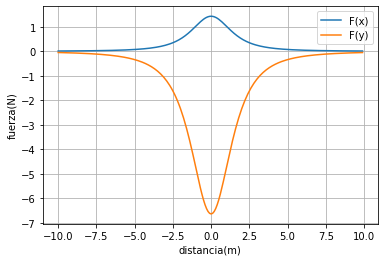

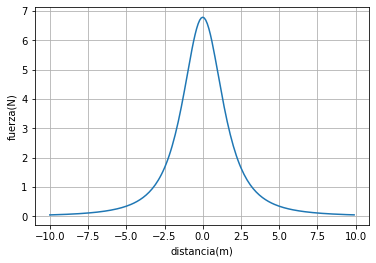


EJERCICIO 4:

METODO DE BISECCION : Existe un valor para h entre 1.4248046875 y 1.42578125
error aparente :  0.0006854009595613434    < 0.001
número aprox de iteraciones para este rango inicial: 10
####################

BUSQUEDA INCREMENTAL: Existe un valor para h entre 1.4249999999999539 y 1.4259999999999537
error aparente :  0.0007012622720897071    < 0.001


In [1]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")


#######################################################################################################
#######################################################################################################
######################################     EJERCICICIO 1     ##########################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 1:")

#De las mallas, se obtienen la siguiente matriz (Eqs_a = Eqs_b) para las ecuaciones
#se consideró (R= 1 Ohm) y (V+=5V)
A =array([(4,-1,-1,-1),
      (-1,3,0,-1),
      (-1,0,3,-1),
       (-1,-1,-1,4)],float)
# print(Eqs_a[2][2], "inicio")
B = array([5,0,5,0],float)

#### ELIMINACION de GAUSS ####
#obtenemos los rangos para poder posteriormente definir las iteraciones 


def Elim_Gauss(Eqs_a,Eqs_b):
    rangoA= len(Eqs_b)
    for i in range(0, rangoA-1):
        for k in range(i+1, rangoA):
            #if Eqs_a[i,i] != 0.0: ya se analizo que siempre es != 0.0
                p_elem = Eqs_a[k][i]/ Eqs_a[i][i]  #se maneja las filas dividiendolas entre el valor de 
                for j in range (0,rangoA):
                    Eqs_a[k][j] =  Eqs_a[k][j] - p_elem*Eqs_a[i][j]
                Eqs_b[k]=Eqs_b[k]-p_elem*Eqs_b[i]
        
    print("Después de la descompsición, se halla las siguientes matrices:")
    print ("A=")
    print(Eqs_a)
    print ("B=")
    return Eqs_b

def sust_inv(M,N):
    rangoM= len(M)
    voltgs = zeros(rangoM)  #se inicia array para los valores finales
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = N[i]
            for k in range(rangoM-1,i, -1):
                temp -= M[i][k]*voltgs[k]
            voltgs[i] = temp/M[i][i]    
    return voltgs

print ("")
print("###############")
print ("")
print("DESCOMPOSICION DE GAUSS")
print ("")
print(Elim_Gauss(A,B))
print("Siendo los valores para los voltajes:")
print (sust_inv(A,B))
print ("")
print("###############")    
print ("")

############ DESCOMPOSICION LU ############

K =array([(4,-1,-1,-1),
      (-1,3,0,-1),
      (-1,0,3,-1),
       (-1,-1,-1,4)],float)
P = array([5,0,5,0],float)

def Descomp_LU(M,N):
    
    #hallamos las matrices L y U

    dim_M = M.shape
    rangoM = len(M)
    L = zeros(dim_M) #inicio matriz L con tamaño dim_M=(rangoM,rangoM) por ser M cuadrada
    U = zeros(dim_M) #inicio U
    for i in range(rangoM):
        L[i,i] = 1.0    #llena la diagonal de L de 1's
        for j in range(i+1,rangoM):
            L[j,i] = M[j,i]/M[i,i]  #Genera la fila j de la matriz
            for k in range(i+1,rangoM):
                M[j,k] = M[j,k] - L[j,i]*M[i,k]
        for k in range(i,rangoM):
            U[i,k] = M[i,k]  #genera la fila i de la matriz U
    print("matrices L y  U respectivamente")
    print("L=")
    print(L)
    print("")
    print("U=")
    print(U)
    print("")
    
    #obtenemos la matriz d (de la eq Ld = b)
    #para esta funcion: b = N
    #usamos la sustitución forward 
    
    d = []  #inicio la matriz d
    rangoN = len(N)
    for i in range(rangoN):
        temp = 0
        d.append(N[i])
        for j in range(i):
            temp = temp + L[i, j]*d[j]
        d[i] = (N[i] - temp)/L[i, i]
    print("")
    print ("encontrandose la matriz d: _de la eq Ld = b_")    
    print(d)
    
    
    #obtenida d, hallamos x (de la eq Ux = d)
    #usamos sustitución backwards/sust_inv del ejercicio anterior
    
    x = zeros(rangoM)  #se inicia matriz x
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = d[i]
            for k in range(rangoM-1,i, -1):
                temp -= U[i][k]*x[k]
            x[i] = temp/U[i][i]  
    print ("")
    print ("encontrandose la matriz x: _de la eq Ux = d_") 
    return (x)
    


print ("")
print("###############")    
print ("")
print("DESCOMPOSICION LU")
print ("")
print(Descomp_LU(K,P))
print ("siendo estas las soluciones")
print ("")
print("###############")    
print ("")

########## DESCOMPOSICION DE CHOLESKY ########## 

K =array([(4,-1,-1,-1),
      (-1,3,0,-1),
      (-1,0,3,-1),
       (-1,-1,-1,4)],float)
P = array([5,0,5,0],float)

def Descomp_Cholesky(M,N):
    dim_M = M.shape
    rangoM = len(M)
    g = zeros(dim_M)
    for i in range(0,rangoM, 1):
        temp = 0
        for k in range(0,i,1):     #buscamos la raiz pedida
            temp = temp + g[k][i]**2
        g[i][i] = sqrt(M[i, i] - temp)
        for j in range(i+1,rangoM, 1):
            temp = 0
            for k in range(0,i,1):
                temp = temp + g[k][i]*g[k][j]
            g[i, j] = (M[i][j]-temp)/g[i][i]
    
    print ("")
    print ("Sea la matriz G para la descomposicion de Cholesky:") 
    print (g)
    print ("y sea su transpuesta:") 
    print (g.T)
    
    # se busca la matriz d por sustitucion forward
    d = []  #inicio la matriz d
    trans_g= g.T   #transpuesta de g
    rangoN = len(N)
    for i in range(rangoN):
        temp = 0
        d.append(N[i])
        for j in range(i):
            temp = temp + trans_g[i, j]*d[j]
        d[i] = (N[i] - temp)/trans_g[i, i]
    print("")
    print ("encontrandose la matriz d: ")    
    print(d)
    
    #se busca la matriz x, por sustitucion backwards
    x = zeros(rangoM) #se inicia array para los valores de la matriz d
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = d[i]
            for k in range(rangoM-1,i, -1):
                temp -= g[i][k]*x[k]
            x[i] = temp/g[i][i]  
    print ("")
    print ("se encuentra la matriz x:") 
    return (x)
    

print ("")
print("###############")    
print ("")
print("DESCOMPOSICION DE CHOLESKY")
print ("")
print(Descomp_Cholesky(K,P))
print ("siendo estas las soluciones")
print ("")
print("###############")    
print ("")




#######################################################################################################
#######################################################################################################
###########################################EJERCICICIO 2###############################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 2:")
#Sean las matrices del problema

A =array([(-0.5,0.25,0),
      (1,-2,1),
      (0,1.667,3.333)],float)

B = array([1,-1.2,-1.3],float)


###Ejercicio 2. Gauss
print ("")
print("###############")
print ("")
print("DESCOMPOSICION DE GAUSS")
print ("")
#print("Luego de la descomposición se hallan las siguientes matrices, A y B")
print(Elim_Gauss(A,B))
print ("")
print("Siendo los valores para las deformaciones:")
print ("")
print (sust_inv(A,B))
print ("")
print("###############")    
print ("")


###Ejercicio 2. Descomposicion LU
print ("")
print("###############")    
print ("")
print("DESCOMPOSICION LU")
print ("")
print(Descomp_LU(A,B))
print ("siendo estas las soluciones para las deformaciones")
print ("")
print("###############")    
print ("")

print ("")
print("###############")    
print ("")
print("DESCOMPOSICION DE CHOLESKY")
# #Para Cholesky necesitamos que la matriz sea definida positiva
# #Luego de las operaciones las matrices resultantes, son:
A_chlsky =array([(2,-1,0),
      (-1,2,-1),
      (0,-1,2)],float)

B_chlsky = array([-4,1.2,0.78],float)
def Cholesky(M,N):
    dim_M = M.shape
    rangoM = len(M)
    g = zeros(dim_M)
    for i in range(0,rangoM, 1):
        temp = 0
        for k in range(0,i,1):     #buscamos la raiz pedida
            temp = temp + g[k][i]**2
        g[i][i] = sqrt(M[i, i] - temp)
        for j in range(i+1,rangoM, 1):
            temp = 0
            for k in range(0,i,1):
                temp = temp + g[k][i]*g[k][j]
            g[i, j] = (M[i][j]-temp)/g[i][i]
    
    print ("")
    print ("Sea la matriz G para la descomposicion de Cholesky:") 
    print (g)
    print ("y sea su transpuesta:") 
    print (g.T)
    
    # se busca la matriz d por sustitucion forward
    d = []  #inicio la matriz d
    trans_g= g.T   #transpuesta de g
    rangoN = len(N)
    for i in range(rangoN):
        temp = 0
        d.append(N[i])
        for j in range(i):
            temp = temp + trans_g[i, j]*d[j]
        d[i] = (N[i] - temp)/trans_g[i, i]
    print("")
    print ("encontrandose la matriz d: ")    
    print(d)
    
    #se busca la matriz x, por sustitucion backwards
    x = zeros(rangoM) #se inicia array para los valores de la matriz d
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = d[i]
            for k in range(rangoM-1,i, -1):
                temp -= g[i][k]*x[k]
            x[i] = temp/g[i][i]  
    print ("")
    print ("se encuentra la matriz x:") 
    return (x)
print ("")
print(Cholesky(A_chlsky,B_chlsky))
print ("siendo estas las soluciones de las deformaciones para Cholesky")
print ("")
print("###############")    
print ("")

#######################################################################################################
#######################################################################################################
########################################## EJERCICICIO 3 ##############################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 3:")

#ctes del problema
#a = 2, 
#q = 10^{-4}
#Q_z = 2*10^{-5}  
# #La fuerza sobre la carga esta dada por las siguiente ecuacioes:

#     F_X = (2*(10**-5)*(10**-4)*0.636)/(4*pi*8.854*(10**-12)*((4+(x**2))**(3/2)))
#     F_Y = ((-2)*(10**-5)*(10**-4)*x*0.738)/(pi*8.854*(10**-12)*((4+(x**2))**(3/2)))
# F_X = (11.846*x)/((4+x**2)**(3/2))
#     F_Y = (-55)/((4+x**2)**(3/2))

X=[]
fx=[]
fy=[]
fr=[]

for x in arange (-10,10,0.1):    
    F_X = (2*(10**-5)*(10**-4)*0.636)/(4*pi*8.854*(10**-12)*((4+(x**2))**(3/2)))
    F_Y = ((-2)*(10**-5)*(10**-4)*0.738)/(pi*8.854*(10**-12)*((4+(x**2))**(3/2)))
    F = ((F_X**2) + (F_Y**2) )**(1/2)
    fx.append(F_X)
    fy.append(F_Y)
    fr.append(F)
    X.append(x)


 
plt.grid()
plt.plot(X,fx, label = "F(x)")
plt.plot(X,fy,label = "F(y)")
plt.legend() 
plt.ylabel('fuerza(N)')
plt.xlabel('distancia(m)')
plt.show()


plt.grid()
plt.plot(X,fr)
plt.ylabel('fuerza(N)')
plt.xlabel('distancia(m)')
plt.show()


#######################################################################################################
#######################################################################################################
########################################## EJERCICICIO 4 ##############################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 4:")
print("")

#con ayuda del principio de arquimedes y la ecuacion dada, llegamos:
#funcion volumen
def f(hi):
    return 5*(hi**3)-15*(hi**2)+16 

def e_ap(xup,xlow):                  #funcion para el error aparente
    return abs((xup-xlow)/xup)

#####     METODO DE BISECCION     #####

#determino mi rango inicial interalo de existencia de h
ai=0
bi=2
ep= 10**(-3)

#hallo pto medio
ea_bsx = 1

while ea_bsx > ep :
    m = (bi+ai)/2
    if f(ai)*f(m)<0 :
        bi=m
    if f(m)*f(bi)<0 :
        ai=m
    ea_bsx = e_ap(bi,ai)
    
    #print(m)
#plt.plot(E_bisec,'b')    
print("METODO DE BISECCION : Existe un valor para h entre",ai,"y",bi)
print("error aparente : ", e_ap(ai,bi), "   <", ep)
print("número aprox de iteraciones para este rango inicial:", int(math.log((2-0)/ep, 2)))

print("####################")
print("")


#####     BUSQUEDA INCREMENTAL     #####


paso  = 0.001
xl= 0
xu= 0
flag = f(xl)*f(xu)  

while flag >0 :     #solo saldrá del loop cuando sea negativo e imprimirá los valores para flag<0
    xl= xu
    xu= xl + paso
    flag = f(xl)*f(xu)
   
    

print("BUSQUEDA INCREMENTAL: Existe un valor para h entre",xl,"y",xu)
print("error aparente : ", e_ap(xu,xl), "   <", ep)
